In [7]:
from bs4 import BeautifulSoup
import requests
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

In [3]:
data = requests.get(url).text

In [4]:
soup = BeautifulSoup(data, "html.parser")

In [5]:
#Scrapes the Language name and Annual average salary and saves results in a CSV file
table = soup.find("table")

with open("popular-languages.csv", "w", newline="", encoding="utf-8") as csvfile:
    writer = csv.writer(csvfile)

    for row in table.find_all("tr"):
        column = row.find_all("td")
        lang_name = column[1].getText()
        annual_avg_sal = column[3].getText()
        writer.writerow([lang_name, annual_avg_sal])

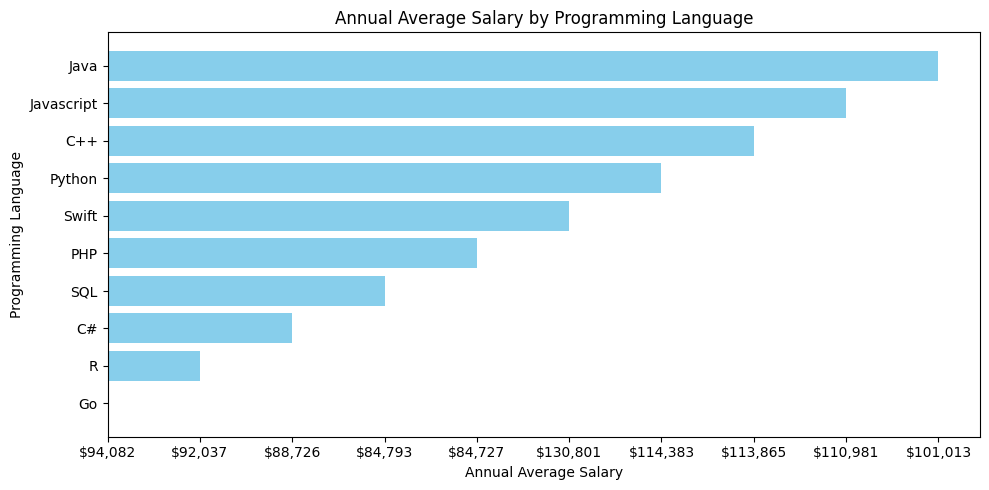

In [10]:
data = pd.read_csv("popular-languages.csv", header=0)

sorted_data = data.sort_values(by="Average Annual Salary", ascending=False)

plt.figure(figsize=(10, 5))
plt.barh(sorted_data["Language"], sorted_data["Average Annual Salary"], color='skyblue')
plt.xlabel('Annual Average Salary')
plt.ylabel('Programming Language')
plt.title('Annual Average Salary by Programming Language')
plt.tight_layout()
plt.show()